In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import data 
import density
import goftest as gof
import kernel 
import util
import matplotlib
import matplotlib.pyplot as plt
import autograd.numpy as np
import scipy.stats as stats

In [2]:
def isogauss_log_den(X):
  mean = np.zeros(2)
  variance = 1
  unden = -np.sum((X - mean)**2, 1) / (2.0 * variance)
  return unden

In [3]:
p = density.from_log_den(2, isogauss_log_den) # UnnormalizedDensity object

In [4]:
# Drawing n points from q
m = 1 # If m = 0, p = q and H_0 is true

seed = 4
np.random.seed(seed)
n = 400
X = np.random.randn(n, 2) + np.array([m, 0])

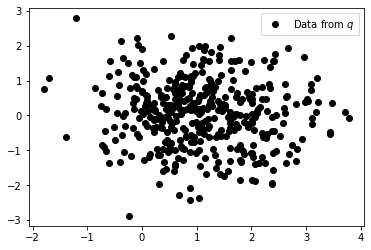

In [5]:
plt.plot(X[:, 0], X[:, 1], 'ko', label='Data from $q$')
plt.legend()

In [6]:
# dat will be fed to the test.
dat = data.Data(X) # Creates a fssdgof Data object here

In [7]:
train, test = dat.split_tr_te(tr_proportion=0.2, seed=2)

In [11]:
# J is the # of test locs (features), not larger than 10
J = 1

opts = {
    'reg': 1e-2, # regularization parameter in the optimization objective
    'max_iter': 50, # maximum number of gradient ascent iterations
    'tol_fun':1e-7, # termination tolerance of the objective
}

# make sure to give train (NOT test).
# do the optimization with the options in opts.
V_opt, gw_opt, opt_info = gof.GaussFSSD.optimize_auto_init(p, train, J, **opts)

In [14]:
alpha = 0.01 # significance level of the test (99% confidence)
fssd_opt = gof.GaussFSSD(p, gw_opt, V_opt, alpha)

AssertionError: sigma2 must be > 0. Was 0